In [ ]:
#@title restart after running this cell
import subprocess

CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"
!git clone https://github.com/kingchloexx/CLIP-Image-Classification
! pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex
!pip install ftfy
!git clone https://github.com/kingchloexx/CLIP-Image-Classification.git
%cd CLIP-Image-Classification

CUDA version: 11.0
Cloning into 'CLIP-Image-Classification'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 101 (delta 51), reused 43 (delta 15), pack-reused 0
Receiving objects: 100% (101/101), 2.16 MiB | 31.54 MiB/s, done.
Resolving deltas: 100% (51/51), done.
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1MB 1.4MB/s eta 0:03:50tcmalloc: large alloc 1147494400 bytes == 0x5566d1518000 @  0x7fd791cf5615 0x55669733706c 0x556697416eba 0x556697339e8d 0x55669742b99d 0x5566973adfe9 0x5566973a8b0e 0x55669733b77a 0x5566973ade50 0x5566973a8b0e 0x55669733b77a 0x5566973aa86a 0x55669742c7c6 0x5566973a9ee2 0x55669742c7c6 0x5566973a9ee2 0x55669742c7c6 0x5566973a9ee2 0x55669742c7c6 0x5566974ae431 0x55669740f049 0x556697379c84 0x55669733a8e9 0x5566973aeade 0x55669733b69a 0x5566973a9a45 0x5566973a8e0d 0x55669733b77a 0x5566973a9a45 

top left x: 128 | top left y 128 | similarity: 0.314208984375


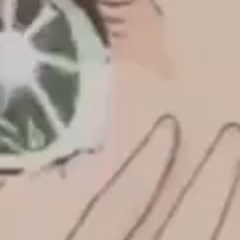

In [ ]:
#@title search image
import numpy as np
from scipy.ndimage.filters import gaussian_filter
from PIL import Image
from classify import load, classify

image_url = "https://blobcdn.same.energy/a/0f/1f/0f1f99ce70c02cbe63813cf345cc3a83ae2efffc"#@param {type:"string"}
search = "eye"#@param {type:"string"}
things=[search]


load(things)
blocks = []
scores = []
rescale = 512#@param
chunk_size=128#@param

!wget "$image_url" -O "/content/input.jpg" -q
image = Image.open("/content/input.jpg")
w,h = image.size
image = image.resize((rescale,rescale))
npimg = np.array(image)
big_chunks=True#@param {type:"boolean"}

def block(x,y):
    b = []
    for i in range(chunk_size-1):
        b.append(npimg[x+i][y:y+chunk_size])
    b = np.array(b)
    b = Image.fromarray(b)
    b.save("image.png")
    return b, classify("image.png", return_raw=True)[0]
blocks = []
scores = []
ii = []
jj = []
# top row

if(big_chunks):
    iterate = int(size/chunk_size-1)
else:
    iterate = rescale
for i in range(iterate):
    for j in range(iterate):
        if(big_chunks):
            b,c = block(i*chunk_size,j*chunk_size)
            ii.append(i*chunk_size)
            jj.append(j*chunk_size)
        else:
            b,c = block(i,j)
            ii.append(i)
            jj.append(j)
        blocks.append(b)
        scores.append(c)
best_index = scores.index(max(scores)) 
iii = ii[best_index]
jjj = jj[best_index]
score = scores[best_index]
print("top left x: {} | top left y {} | similarity: {}".format(iii,jjj,score))
blocks[scores.index(max(scores))].resize((int(w/8)*4,int(h/8)*4))